# Chạy mô hình dự đoán ưng thu bệnh gan


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Xử lý dữ liệu

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
data=pd.read_csv("indian_liver_patient.csv")
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [8]:
data.info() #một số trường dữ liệu bị thiếu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [9]:
data.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [10]:
data['Albumin_and_Globulin_Ratio'].fillna(value=0, inplace=True)  #thay thế các giá trị thiếu bằng 0

C:\Users\FPT\AppData\Local\Temp\ipykernel_27708\127385593.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Albumin_and_Globulin_Ratio'].fillna(value=0, inplace=True)  #thay thế các giá trị thiếu bằng 0


### Gán bệnh nhân mắc bệnh là 1, không mắc bệnh là 0


In [11]:
data['Dataset'] = data['Dataset'].map({2:0,1:1})

In [12]:
data['Dataset'].value_counts()

Dataset
1    416
0    167
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

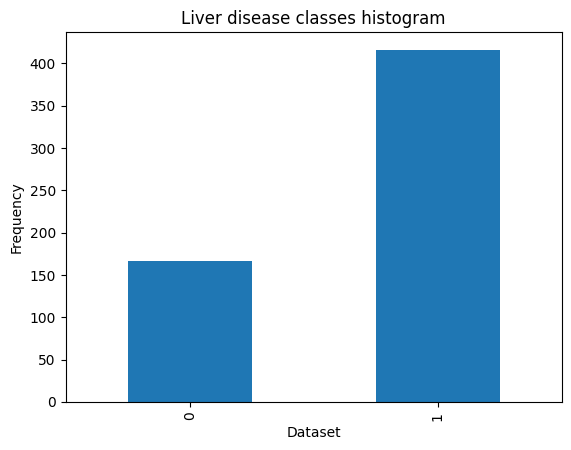

In [ ]:
count_classes = pd.value_counts(data['Dataset'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Liver disease classes histogram")
plt.xlabel("Dataset")
plt.ylabel("Frequency")

### Tạo bảng tóm tắt



In [ ]:
data.describe() #tạo bảng tóm tắt thống kê các thông số đặc trưng

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.940566,0.713551
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.327962,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.000000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.920000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


### Tỉ lệ giới tính và mã hóa nó

<Axes: xlabel='Gender', ylabel='count'>

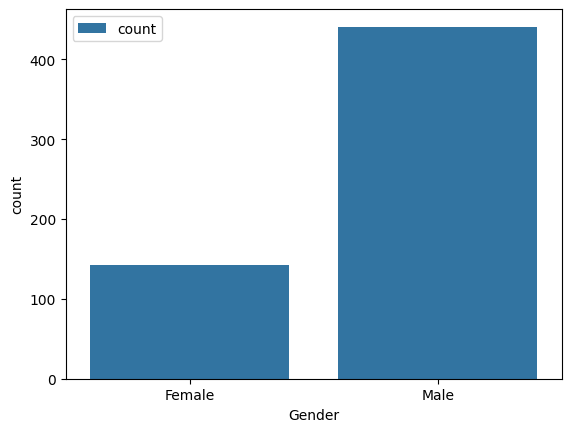

In [ ]:
import seaborn as sns
sns.countplot(data = data, x='Gender', label='count')

#### Mã hóa

In [14]:
def partition(x):
    if x == 'Male':
        return 1
    return 0

data['Gender'] = data['Gender'].map(partition)

In [15]:
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


### Chuyển cột data set thành các giá trị 0 và 1
#### '1' cho bệnh gan và '2' cho không có bệnh gan vì vậy hãy đặt nó thành 0 cho không có bệnh để thuận tiện

In [ ]:
# def partition(x):
#     if x == 2:
#         return 0
#     return 1

# data['Dataset'] = data['Dataset'].map(partition)


In [16]:
data['Dataset']

0      1
1      1
2      1
3      1
4      1
      ..
578    0
579    1
580    1
581    1
582    0
Name: Dataset, Length: 583, dtype: int64

### Tạo biểu đồ headmap hiển thị sự tương quan tăng giảm giữa các đối tượng liên quan

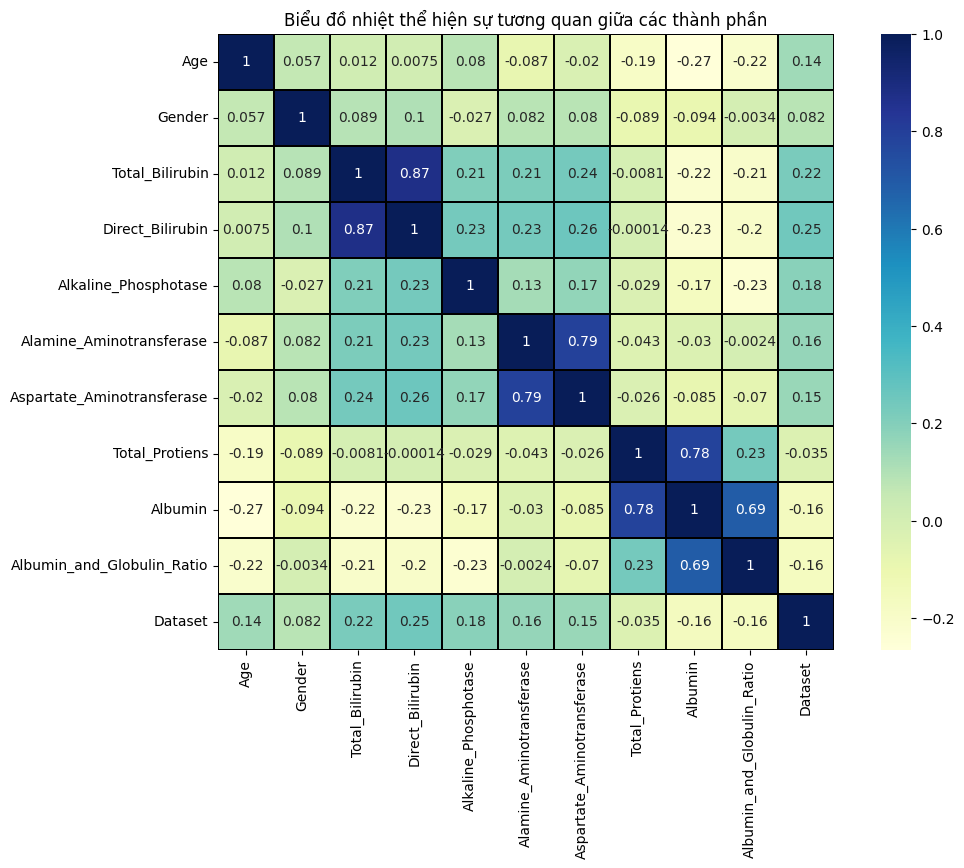

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Biểu đồ nhiệt thể hiện sự tương quan giữa các thành phần')
sns.heatmap(data.corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black',annot=True)
plt.show()

## Chạy mô hình

### Chia tập dữ liệu

In [17]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values #dataset

### Chia thành dữ liệu huấn luyện và kiểm tra


#### Sử dụng kĩ thuật feature scaling và smote (Tính mới)
##### Những mô hình thông thường chia dữ liệu 1 cách khá ngẫu nhiên dẫn đến nhiều dữ liệu bị chồng chéo giữa các lớp. Sử dụng kĩ thuật này trước khi chia dữ liệu giúp cải thiện hiệu suất của mô hình phân loại trên dữ liệu mất cân bằng.Thực hiện feature scaling trước (để chuẩn hóa các đặc trưng của dữ liệu), sau đó thực hiện SMOTE để xử lý mất cân bằng dữ liệu.

##### Smote - Xư lý mất cân bằng
![Công thức](https://drive.google.com/uc?export=view&id=1ZISaQtrjfz4zWlH6GZuTsT2Hw1xNfa-G)

In [20]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from collections import Counter

def smote(X, y, minority_class): # để tăng cường lớp thiểu số
    # Tìm các mẫu thuộc lớp thiểu số
    X_minority = X[y == minority_class]

    # Số lượng mẫu cần tạo thêm
    n_minority_samples = X_minority.shape[0]
    n_neighbors = 5

    # Kết nối k láng giềng gần nhất
    neighbors = NearestNeighbors(n_neighbors=n_neighbors + 1).fit(X_minority)
    indices = neighbors.kneighbors(X_minority, return_distance=False)[:, 1:]

    # Tạo các mẫu tổng hợp
    synthetic_samples = []
    for i in range(n_minority_samples):
        for _ in range(n_neighbors):
            nn = np.random.choice(indices[i])
            diff = X_minority[nn] - X_minority[i]
            synthetic_sample = X_minority[i] + np.random.rand() * diff
            synthetic_samples.append(synthetic_sample)

    # Chuyển đổi thành numpy array
    synthetic_samples = np.array(synthetic_samples)

    # Kết hợp với dữ liệu ban đầu
    X_resampled = np.vstack((X, synthetic_samples))
    y_resampled = np.hstack((y, np.full(synthetic_samples.shape[0], minority_class)))

    return X_resampled, y_resampled

def tomek_links(X, y): # loại bỏ các mẫu gây nhiễu
    from sklearn.neighbors import NearestNeighbors

    # Kết nối 1 láng giềng gần nhất
    nn = NearestNeighbors(n_neighbors=2).fit(X)
    distances, indices = nn.kneighbors(X)

    # Tìm Tomek links
    tomek_links = []
    for i in range(len(X)):
        if y[i] != y[indices[i][1]]:
            if indices[indices[i][1]][1] == i:
                tomek_links.append(i)

    # Xóa các mẫu Tomek links
    mask = np.ones(len(X), dtype=bool)
    mask[tomek_links] = False

    return X[mask], y[mask]

def smote_tomek(X, y):
    # Tìm lớp thiểu số
    counter = Counter(y)
    majority_class = max(counter, key=counter.get)
    minority_class = min(counter, key=counter.get)

    # Áp dụng SMOTE
    X_resampled, y_resampled = smote(X, y, minority_class)

    # Áp dụng Tomek links
    X_cleaned, y_cleaned = tomek_links(X_resampled, y_resampled)

    return X_cleaned, y_cleaned

X_smote, y_smote = smote_tomek(X, y)


##### Chia dữ liệu

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_smote,y_smote, test_size=0.3, random_state=33)

##### Feature - Chuẩn hóa
![Công thức](https://drive.google.com/uc?export=view&id=1idPkdOEfTfCyrejmJYFeFyGsj5PpV7Zq)

In [22]:
import numpy as np

def fit_transform_standard_scaler(x_train):
    means = np.mean(x_train, axis=0)
    stds = np.std(x_train, axis=0)
    x_train = (x_train - means) / stds
    return x_train, means, stds

# Hàm để chuẩn hóa tập kiểm tra sử dụng các thông số từ tập huấn luyện
def transform_standard_scaler(x_test, means, stds):
    x_test = (x_test - means) / stds
    return x_test

# Chuẩn hóa tập huấn luyện và tính toán mean và std
x_train, means, stds = fit_transform_standard_scaler(x_train)

# Chuẩn hóa tập kiểm tra sử dụng các thông số từ tập huấn luyện
x_test = transform_standard_scaler(x_test, means, stds)

### RandomForestClassifier

In [24]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import StandardScaler
import joblib

# Giả sử bạn đã có dữ liệu X và y
# X = ...
# y = ...

# Áp dụng SMOTETomek
smote = SMOTETomek()
X_smote, y_smote = smote.fit_resample(X, y)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
x_train, x_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=33)

# Chuẩn hóa dữ liệu
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Xây dựng mô hình Random Forest
RandomForest = RandomForestClassifier()
RandomForest = RandomForest.fit(x_train, y_train)

# Dự đoán nhãn trên tập kiểm tra
y_pred = RandomForest.predict(x_test)

# Tính chỉ số Accuracy và lưu lại
accuracy_rf = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy_rf)

# Lưu mô hình và scaler
joblib.dump(RandomForest, 'random_forest_model.pkl')
joblib.dump(sc, 'scaler.pkl')


Accuracy: 0.7805907172995781


['scaler.pkl']

In [ ]:
# Tạo DataFrame để so sánh y_test và y_pred
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# In ra DataFrame
print(comparison)

     Actual  Predicted
0         0          0
1         0          0
2         0          0
3         0          0
4         1          1
..      ...        ...
410       1          0
411       0          0
412       0          0
413       0          0
414       0          0

[415 rows x 2 columns]


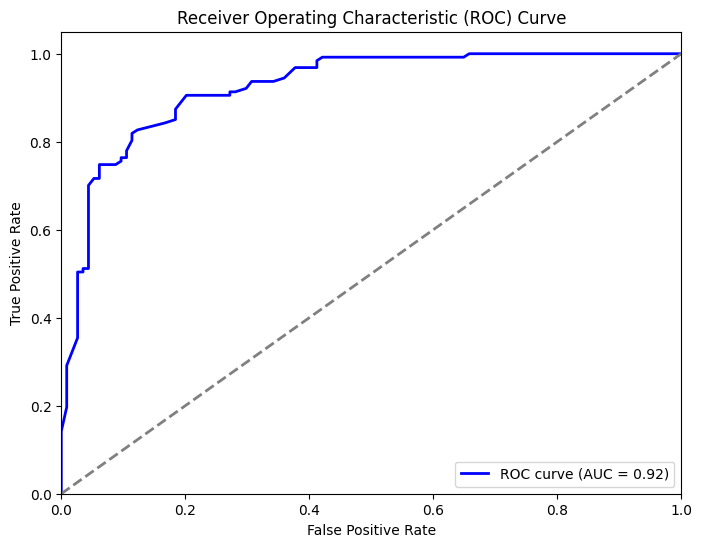

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve,roc_auc_score

# Tính toán các giá trị cần thiết cho biểu đồ ROC
y_pred_proba = RandomForest.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Vẽ biểu đồ ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

##### Dự đoán từ đầu vào

In [ ]:
import numpy as np
import joblib

# Load mô hình và scaler
model = joblib.load('random_forest_model.pkl')
scaler = joblib.load('scaler.pkl')

# Nhập các chỉ số từ người dùng
def get_user_input():
    feature_names = [
        "Age", "Gender", "Total_Bilirubin", "Direct_Bilirubin", "Alkaline_Phosphotase",
        "Alamine_Aminotransferase", "Aspartate_Aminotransferase", "Total_Protiens",
        "Albumin", "Albumin_and_Globulin_Ratio"
    ]
    user_input = []
    for feature in feature_names:
        value = float(input(f"Nhập giá trị cho {feature}: "))
        user_input.append(value)
    return np.array(user_input).reshape(1, -1)

# Nhận dữ liệu đầu vào từ người dùng
user_input = get_user_input()

# Chuẩn hóa dữ liệu đầu vào
user_input_scaled = scaler.transform(user_input)

# Dự đoán
prediction = model.predict(user_input_scaled)

# In kết quả
if prediction[0] == 1:
    print("Dự đoán: Mắc bệnh")
else:
    print("Dự đoán: Không mắc bệnh")


Nhập giá trị cho Age: 65
Nhập giá trị cho Gender: 0
Nhập giá trị cho Total_Bilirubin: 0.7
Nhập giá trị cho Direct_Bilirubin: 0.1
Nhập giá trị cho Alkaline_Phosphotase: 187
Nhập giá trị cho Alamine_Aminotransferase: 16
Nhập giá trị cho Aspartate_Aminotransferase: 18
Nhập giá trị cho Total_Protiens: 6.8
Nhập giá trị cho Albumin: 3.3
Nhập giá trị cho Albumin_and_Globulin_Ratio: 0.9
Dự đoán: Mắc bệnh


In [ ]:
from sklearn.metrics import f1_score
f1_rf = f1_score(y_test, y_pred)

# In ra chỉ số F1-score
print('F1-score:', f1_rf)

F1-score: 0.8378378378378378


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import jaccard_score

# Xây dựng mô hình Random Forest
liverDisease_rf = RandomForestClassifier()

# Huấn luyện mô hình trên tập huấn luyện
liverDisease_rf.fit(x_train, y_train)

# Dự đoán nhãn trên tập kiểm tra
rf_yhat = liverDisease_rf.predict(x_test)

# Tính chỉ số Jaccard
rf_ja = jaccard_score(y_test, rf_yhat)

print("Jaccard:",rf_ja)


Jaccard: 0.6842105263157895


### KNN

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, jaccard_score
from sklearn.neighbors import KNeighborsClassifier

# Xây dựng mô hình KNN
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

# Dự đoán nhãn trên tập kiểm tra
y_pred_knn = knn.predict(x_test)

# Tính và lưu chỉ số Accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Tính và lưu chỉ số F1-score
f1_knn = f1_score(y_test, y_pred_knn)

# Tính và lưu chỉ số Jaccard
jaccard_knn = jaccard_score(y_test, y_pred_knn)

# In ra các chỉ số
print("Accuracy của KNN:", accuracy_knn)
print("F1-score của KNN:", f1_knn)
print("Jaccard score của KNN:", jaccard_knn)


Accuracy của KNN: 0.7457627118644068
F1-score của KNN: 0.6938775510204082
Jaccard score của KNN: 0.53125


### Decision Tree

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, jaccard_score
from sklearn.tree import DecisionTreeClassifier

# Xây dựng mô hình Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

# Dự đoán nhãn trên tập kiểm tra
y_pred_dt = decision_tree.predict(x_test)

# Tính và lưu chỉ số Accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Tính và lưu chỉ số F1-score
f1_dt = f1_score(y_test, y_pred_dt)

# Tính và lưu chỉ số Jaccard
jaccard_dt = jaccard_score(y_test, y_pred_dt)

# In ra các chỉ số
print("Accuracy của Decision Tree:", accuracy_dt)
print("F1-score của Decision Tree:", f1_dt)
print("Jaccard score của Decision Tree:", jaccard_dt)


Accuracy của Decision Tree: 0.7627118644067796
F1-score của Decision Tree: 0.7431192660550457
Jaccard score của Decision Tree: 0.5912408759124088


### LogisticRegression

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, jaccard_score
from sklearn.linear_model import LogisticRegression

# Xây dựng mô hình Logistic Regression
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)

# Dự đoán nhãn trên tập kiểm tra
y_pred_lr = logistic_regression.predict(x_test)

# Tính và lưu chỉ số Accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Tính và lưu chỉ số F1-score
f1_lr = f1_score(y_test, y_pred_lr)

# Tính và lưu chỉ số Jaccard
jaccard_lr = jaccard_score(y_test, y_pred_lr)

# In ra các chỉ số
print("Accuracy của Logistic Regression:", accuracy_lr)
print("F1-score của Logistic Regression:", f1_lr)
print("Jaccard score của Logistic Regression:", jaccard_lr)

Accuracy của Logistic Regression: 0.7627118644067796
F1-score của Logistic Regression: 0.7021276595744681
Jaccard score của Logistic Regression: 0.5409836065573771


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### So sánh kết quả

In [ ]:
# Khởi tạo các mô hình
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Khởi tạo dataframe để lưu kết quả
results = pd.DataFrame(columns=["Accuracy", "F1-score", "Jaccard"])

# Lặp qua từng mô hình để tính và lưu các chỉ số
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    jaccard = jaccard_score(y_test, y_pred)
    results.loc[name] = [accuracy, f1, jaccard]

# Vẽ bảng hiển thị kết quả
print("Kết quả:")
print(results)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Kết quả:
                     Accuracy  F1-score   Jaccard
Logistic Regression  0.762712  0.702128  0.540984
Decision Tree        0.771186  0.758929  0.611511
KNN                  0.745763  0.693878  0.531250
Random Forest        0.843220  0.831050  0.710938


Kết quả của nghiên cứu khác:

![Kết quả nghiên cứu khác](https://drive.google.com/uc?export=view&id=1ce3Q76NFiXZKb6pgGrD4d3Y8Ff-hLbCe)

- **Accuracy:** Đây là tỷ lệ phần trăm giữa số lượng dự đoán chính xác và tổng số dự đoán. Nó cho biết mức độ chính xác của mô hình trong việc dự đoán nhãn của các điểm dữ liệu.
- **F1-score:** Đây là một số đo kết hợp giữa độ chính xác (precision) và độ phủ (recall) của mô hình. Nó thường được sử dụng khi dữ liệu mất cân bằng và mức độ quan trọng của việc phân loại sai các lớp là khác nhau.
- **Jaccard:** Còn được gọi là chỉ số Jaccard, là một phép đo độ tương đồng giữa hai tập hợp, đo bằng tỷ lệ giữa kích thước tập hợp giao nhau và kích thước tập hợp hợp nhất của chúng. Trong ngữ cảnh phân loại, Jaccard score được sử dụng để đo sự tương đồng giữa tập hợp các nhãn dự đoán và tập hợp các nhãn thực tế của mô hình.
